/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_75788/1095459608.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)
/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_75788/1095459608.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels = ['0','1','2','3','4',"6"], ylim = (25,50), xlabel = 'Week')
/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_75788/1095459608.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels = ['0','1','2','3','4',"6"], ylim = (0,25), xlabel = 'Week')


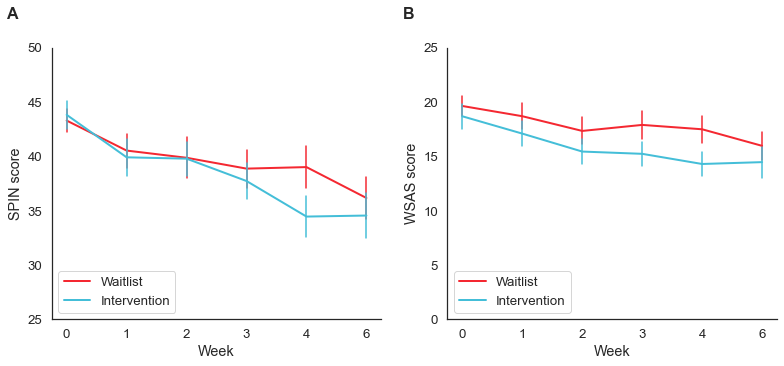

In [144]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/Users/garvert/Documents/Alena/RCT/rct-data/rct-2022-11/merged.csv', delimiter=',', error_bad_lines=False)

spin = df[["spintot_0","spintot_w1","spintot_w2","spintot_w3","spintot_w4","spintot_w6","group"]]
spin_melted = spin.melt(id_vars = 'group', var_name="timepoint", value_name="SPIN score")

wsas = df[["wsastot_0","wsastot_w1","wsastot_w2","wsastot_w3","wsastot_w4","wsastot_w6","group"]]
wsas_melted = wsas.melt(id_vars = 'group', var_name="timepoint", value_name="WSAS score")

fig = plt.figure(figsize=(13,5))
for i, label in enumerate(('A', 'B')):
    ax = fig.add_subplot(1,2,i+1)
    ax.text(-0.1, 1.15, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
    
    if i == 0:
        g = sns.lineplot(data=spin_melted, x = 'timepoint', y = 'SPIN score', hue = 'group', 
                        err_style="bars", errorbar=("se"), palette=["#f42831", "#44bed8"], linewidth=2, ax = ax)
        ax.legend(labels=["Waitlist","Intervention"], loc = 3)
        g.set(xticklabels = ['0','1','2','3','4',"6"], ylim = (25,50), xlabel = 'Week')
        ax.spines[['right', 'top']].set_visible(False)

    else:
        g = sns.lineplot(data=wsas_melted, x = 'timepoint', y = 'WSAS score', hue = 'group', 
                        err_style="bars", errorbar=("se"), palette=["#f42831", "#44bed8"], linewidth=2, ax = ax)
        g.set(xticklabels = ['0','1','2','3','4',"6"], ylim = (0,25), xlabel = 'Week')
        ax.spines[['right', 'top']].set_visible(False)
        ax.legend(labels=["Waitlist","Intervention"], loc = 3)


plt.savefig('waitlist_intervention.png', dpi=300)

plt.show()

/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_75788/3745756372.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels = ['0','1','2','3','4',"6"], ylim = (25,50), xlabel = 'Week')
/var/folders/jr/vpz3bd1119zgz0p25m86p7580000gn/T/ipykernel_75788/3745756372.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels = ['0','1','2','3','4',"6"], ylim = (0,25), xlabel = 'Week')


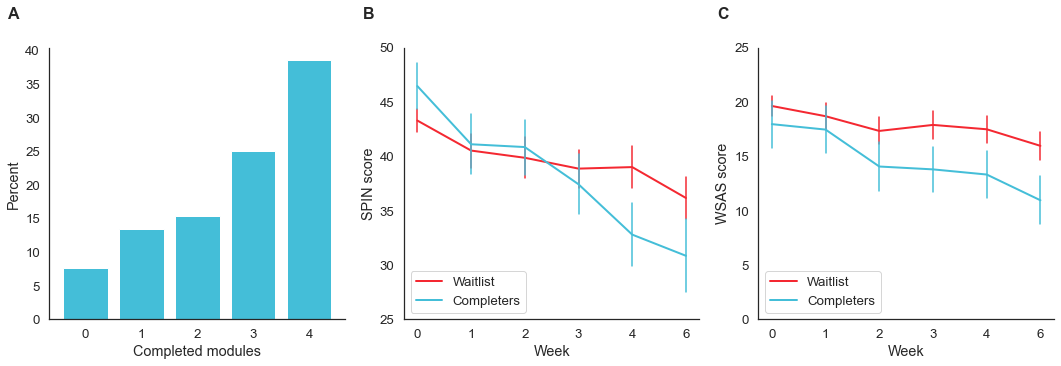

In [156]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df = df.drop(df[df.completed== 0].index)
df.head()

spin = df[["spintot_0","spintot_w1","spintot_w2","spintot_w3","spintot_w4","spintot_w6","group"]]
spin_melted = spin.melt(id_vars = 'group', var_name="timepoint", value_name="SPIN score")

wsas = df[["wsastot_0","wsastot_w1","wsastot_w2","wsastot_w3","wsastot_w4","wsastot_w6","group"]]
wsas_melted = wsas.melt(id_vars = 'group', var_name="timepoint", value_name="WSAS score")

fig = plt.figure(figsize=(18,5))

list = [7.7, 13.5, 15.4, 25.0, 38.5]
ax = fig.add_subplot(1,3,1)
g = ax.bar(range(0,5), list, color = '#44bed8')
ax.set_xlabel('Completed modules')
ax.set_ylabel('Percent')
ax.spines[['right', 'top']].set_visible(False)
ax.text(-0.1, 1.15, 'A', transform=ax.transAxes,
  fontsize=16, fontweight='bold', va='top', ha='right')

for i, label in enumerate(('B', 'C')):
    ax = fig.add_subplot(1,3,i+2)
    ax.text(-0.1, 1.15, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
    
    if i == 0:
        g = sns.lineplot(data=spin_melted, x = 'timepoint', y = 'SPIN score', hue = 'group', 
                        err_style="bars", errorbar=("se"), palette=["#f42831", "#44bed8"], linewidth=2, ax = ax)
        ax.legend(labels=["Waitlist","Completers"], loc = 3)
        g.set(xticklabels = ['0','1','2','3','4',"6"], ylim = (25,50), xlabel = 'Week')
        ax.spines[['right', 'top']].set_visible(False)

    else:
        g = sns.lineplot(data=wsas_melted, x = 'timepoint', y = 'WSAS score', hue = 'group', 
                        err_style="bars", errorbar=("se"), palette=["#f42831", "#44bed8"], linewidth=2, ax = ax)
        g.set(xticklabels = ['0','1','2','3','4',"6"], ylim = (0,25), xlabel = 'Week')
        ax.spines[['right', 'top']].set_visible(False)
        ax.legend(labels=["Waitlist","Completers"], loc = 3)


plt.savefig('waitlist_completers.png', dpi=300)

plt.show()

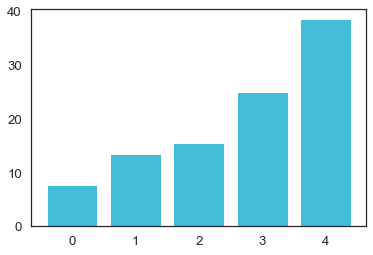

In [150]:


fig = plt.figure()
plt.bar(range(0,5), list, color = '#44bed8')

plt.show()